# Data Scientist Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 


This notebook walks you through one of the most popular Udacity projects across machine learning and artificial intellegence nanodegree programs.  The goal is to classify images of dogs according to their breed.  

If you are looking for a more guided capstone project related to deep learning and convolutional neural networks, this might be just it.  Notice that even if you follow the notebook to creating your classifier, you must still create a blog post or deploy an application to fulfill the requirements of the capstone project.

Also notice, you may be able to use only parts of this notebook (for example certain coding portions or the data) without completing all parts and still meet all requirements of the capstone project.

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [3]:
from sklearn.datasets import load_files       
from keras import utils
import numpy as np
from glob import glob
import random
import requests
import zipfile

random.seed(8675309)

url = 'https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip'
response = requests.get(url)
open("dog_images.zip", "wb").write(response.content)


with zipfile.ZipFile("dog_images.zip", 'r') as zip_ref:
    zip_ref.extractall("data")


# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
# load train, test, and validation datasets
train_files, train_targets = load_dataset('data/dogImages/train')
valid_files, valid_targets = load_dataset('data/dogImages/valid')
test_files, test_targets = load_dataset('data/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("data/dogImages/train/*/"))]
# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

2023-08-25 22:58:53.410484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [98]:
import pandas as pd

train_df = pd.DataFrame(data=train_targets, columns=dog_names)
valid_df = pd.DataFrame(data=valid_targets, columns=dog_names)
test_df = pd.DataFrame(data=test_targets, columns=dog_names)

In [102]:
train_df.head()

/001.Affenpinscher  /002.Afghan_hound  /003.Airedale_terrier  /004.Akita  \
0                 0.0                0.0                    0.0         0.0   
1                 0.0                0.0                    0.0         0.0   
2                 0.0                0.0                    0.0         0.0   
3                 0.0                0.0                    0.0         0.0   
4                 0.0                0.0                    0.0         0.0   

   /005.Alaskan_malamute  /006.American_eskimo_dog  /007.American_foxhound  \
0                    0.0                       0.0                     0.0   
1                    0.0                       0.0                     0.0   
2                    0.0                       0.0                     0.0   
3                    0.0                       0.0                     0.0   
4                    0.0                       0.0                     0.0   

   /008.American_staffordshire_terrier  /009.American_water_spaniel  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  1.0                          0.0   
4                                  1.0                          0.0   

   /010.Anatolian_shepherd_dog  ...  /124.Poodle  /125.Portuguese_water_dog  \
0                          0.0  ...          0.0                        0.0   
1                          0.0  ...          0.0                        0.0   
2                          0.0  ...          0.0                        0.0   
3                          0.0  ...          0.0                        0.0   
4                          0.0  ...          0.0                        0.0   

   /126.Saint_bernard  /127.Silky_terrier  /128.Smooth_fox_terrier  \
0                 0.0                 0.0                      0.0   
1                 0.0                 0.0                      0.0   
2                 0.0                 0.0                      0.0   
3                 0.0                 0.0                      0.0   
4                 0.0                 0.0                      0.0   

   /129.Tibetan_mastiff  /130.Welsh_springer_spaniel  \
0                   0.0                          0.0   
1                   0.0                          0.0   
2                   0.0                          0.0   
3                   0.0                          0.0   
4                   0.0                          0.0   

   /131.Wirehaired_pointing_griffon  /132.Xoloitzcuintli  \
0                               0.0                  0.0   
1                               0.0                  0.0   
2                               0.0                  0.0   
3                               0.0                  0.0   
4                               0.0                  0.0   

   /133.Yorkshire_terrier  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 133 columns]

In [107]:
total_df = (train_df.sum() + valid_df.sum() + test_df.sum()).sort_values()
sum_df = total_df.sum()
values = list(total_df)
print(values)
print(sum_df)
x = total_df.index
print(x)

[33.0, 33.0, 35.0, 36.0, 37.0, 37.0, 38.0, 38.0, 38.0, 39.0, 39.0, 40.0, 41.0, 41.0, 42.0, 42.0, 42.0, 42.0, 44.0, 44.0, 44.0, 46.0, 46.0, 49.0, 49.0, 49.0, 50.0, 51.0, 51.0, 51.0, 52.0, 53.0, 53.0, 53.0, 54.0, 54.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 59.0, 59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 63.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 68.0, 70.0, 70.0, 71.0, 71.0, 71.0, 72.0, 73.0, 73.0, 74.0, 74.0, 75.0, 76.0, 76.0, 77.0, 77.0, 78.0, 78.0, 78.0, 79.0, 79.0, 79.0, 79.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 81.0, 81.0, 81.0, 82.0, 82.0, 82.0, 83.0, 83.0, 84.0, 86.0, 86.0, 87.0, 89.0, 92.0, 93.0, 96.0]
8351.0
Index(['/108.Norwegian_buhund', '/132.Xoloitzcuintli', '/121.Plott',
       '/102.Manchester_terrier', '/131.Wirehaired_pointing_griffon',
       '/126.Saint_bernard', '/133.Yorkshire_terrier',


In [109]:
#proportions of the min and max:
min_proportion  = (values[0]/ sum_df) * 100
max_proportion = (values[-1] / sum_df) * 100

print(min_proportion)
print(max_proportion)

0.3951622560172435
1.1495629265956173


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [4]:
url = 'https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip'
response = requests.get(url)
open("lfw.zip", "wb").write(response.content)
with zipfile.ZipFile("lfw.zip", 'r') as zip_ref:
    zip_ref.extractall("data")
# load filenames in shuffled human dataset
human_files = np.array(glob("data/lfw/*/*"))
random.shuffle(human_files)
# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

[[ 75  68 112 112]]
Number of faces detected: 1


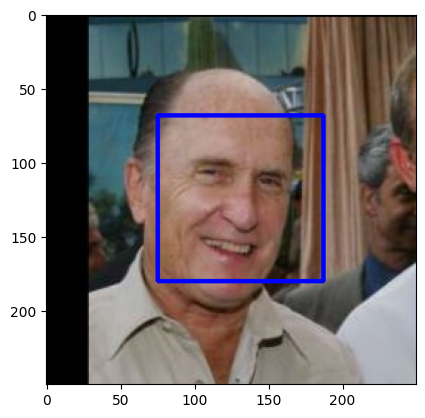

In [10]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)
print(faces)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

[[ 70  68 110 110]]
Number of faces detected: 1


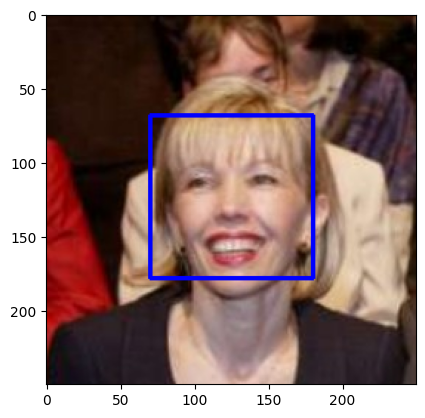

In [83]:

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[2])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)
print(faces)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [11]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ We detect 100% humans in the human files, and we detect 12% humans in the dog files. 

In [12]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.


detected_human_faces = 0
for files in human_files_short:
    face = face_detector(files)
    #if face is found
    if face:
        detected_human_faces+=1


detected_dog_face = 0
for files in dog_files_short:
    face = face_detector(files)
    if face:
        detected_dog_face +=1

percent_faces = (detected_human_faces / 100.0)  * 100
percent_dog_face = (detected_dog_face / 100.0) * 100
print('Percent faces found in the human files: %d %%' % percent_faces)

print('Percent faces found in the dog files: %d %%' % percent_dog_face)

Percent faces found in the human files: 100 %
Percent faces found in the human files: 12 %


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__ Perhaps if the user is aware that they must provide a human face, it could be okay. But as a learning algorithm, it would be expected that the classifier would be able to idenitify if we are dealing with a human face without extra input from the user. The algorithm should be able to differentiate between various poses and should be trained in that way for it to be a robust final product.

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

data/lfw/Doris_Schroeder/Doris_Schroeder_0004.jpg
Faces:
anger: VERY_UNLIKELY
joy: VERY_UNLIKELY
surprise: VERY_UNLIKELY


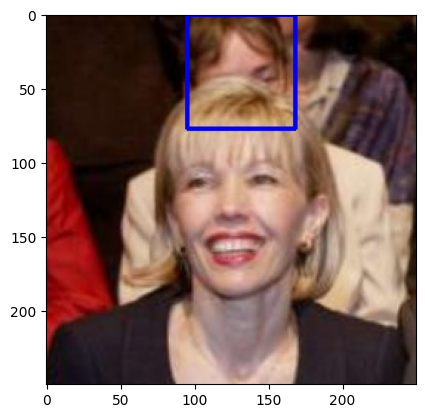

anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY


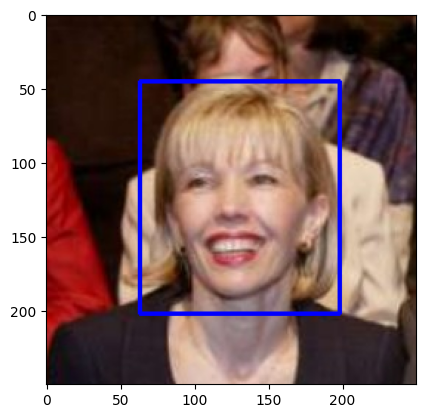

In [14]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

from google.cloud import vision
from google.oauth2 import service_account

def detect_faces(path):
    """Detects faces in an image."""


    credentials = service_account.Credentials.from_service_account_file('service_acc_key.json')
    client = vision.ImageAnnotatorClient(credentials=credentials)

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = (
        "UNKNOWN",
        "VERY_UNLIKELY",
        "UNLIKELY",
        "POSSIBLE",
        "LIKELY",
        "VERY_LIKELY",
    )
    print("Faces:")

    for face in faces:
        print(f"anger: {likelihood_name[face.anger_likelihood]}")
        print(f"joy: {likelihood_name[face.joy_likelihood]}")
        print(f"surprise: {likelihood_name[face.surprise_likelihood]}")

      
        x2 = face.bounding_poly.vertices[1].x
        y2 = face.bounding_poly.vertices[1].y
        
        x4 = face.bounding_poly.vertices[3].x
        y4 = face.bounding_poly.vertices[3].y

        img = cv2.imread(path)
        cv2.rectangle(img,(x4,y4),(x2,y2),(255,0,0),2)
          
        # convert BGR image to RGB for plotting
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # display the image, along with bounding box
        plt.imshow(cv_rgb)
        plt.show()
  

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )

human_file = human_files[2:]
print(human_file[0])
detect_faces(human_file[0])

data/lfw/Sophia_Loren/Sophia_Loren_0007.jpg
Faces:
anger: VERY_UNLIKELY
joy: LIKELY
surprise: VERY_UNLIKELY


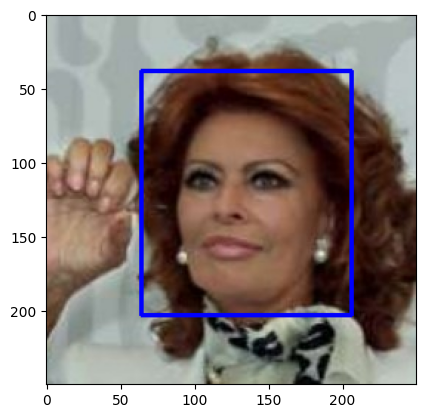

In [87]:
human_file = human_files[10:]
print(human_file[0])
detect_faces(human_file[0])

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [15]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [16]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [17]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [18]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [19]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = train_files[:100]

human_dog_detected = 0
dog_dog_detected = 0
for humans in human_files_short:
    if dog_detector(humans):
        human_dog_detected+=1

for dog in dog_files_short:
    if dog_detector(dog):
        dog_dog_detected +=1 

1/1 [==============================] - 0s 114ms/step


In [20]:

print('Percent dogs found in the human files: %d %%' % human_dog_detected)
print('Percent dogs found in the dog files: %d %%' % dog_dog_detected)

Percent dogs found in the human files: 0 %
Percent dogs found in the dog files: 100 %


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [21]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:06<00:00, 134.59it/s]


In [22]:
train_shape = train_tensors.shape[1:]
print(train_shape)

(224, 224, 3)


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ I did some research on how Batch Normalization allows for better modeling techniques, in addition to improving converging times. At first I was going to use them concurrently with Dropout, but  research paper said to avoid internal  variants shifts we should utilzie Dropout with a .2 rate at the end of our model. I utilized increasing Convlutional filters throughout the model  up until our final Dropout and Average Pooling

In [23]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(input_shape=train_shape,filters=16, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))
model.add(Conv2D(filters=64, kernel_size =(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(133, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 32)      128       
 chNormalization)                                                
                                                        

### Compile the Model

In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [25]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 10

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/10
334/334 [==============================] - ETA: 0s - loss: 4.7276 - accuracy: 0.0283
Epoch 1: val_loss improved from inf to 5.18793, saving model to saved_models/weights.best.from_scratch.hdf5


/Users/quantum_healer/Desktop/capstone_project/dog_venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


334/334 [==============================] - 221s 655ms/step - loss: 4.7276 - accuracy: 0.0283 - val_loss: 5.1879 - val_accuracy: 0.0192
Epoch 2/10
334/334 [==============================] - ETA: 0s - loss: 4.4837 - accuracy: 0.0491
Epoch 2: val_loss improved from 5.18793 to 4.57734, saving model to saved_models/weights.best.from_scratch.hdf5
334/334 [==============================] - 185s 552ms/step - loss: 4.4837 - accuracy: 0.0491 - val_loss: 4.5773 - val_accuracy: 0.0371
Epoch 3/10
334/334 [==============================] - ETA: 0s - loss: 4.3475 - accuracy: 0.0675
Epoch 3: val_loss improved from 4.57734 to 4.40818, saving model to saved_models/weights.best.from_scratch.hdf5
334/334 [==============================] - 206s 615ms/step - loss: 4.3475 - accuracy: 0.0675 - val_loss: 4.4082 - val_accuracy: 0.0575
Epoch 4/10
334/334 [==============================] - ETA: 0s - loss: 4.2183 - accuracy: 0.0889
Epoch 4: val_loss improved from 4.40818 to 4.29021, saving model to saved_models/we

### Load the Model with the Best Validation Loss

In [26]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [27]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 32ms/step
Test accuracy: 11.9617%


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [28]:

bottleneck_features = np.load('bottleneck_features/DogXceptionData.npz')
train_Xception = bottleneck_features['train']
valid_Xception = bottleneck_features['valid']
test_Xception = bottleneck_features['test']

Xception_model = Sequential()
Xception_model.add(GlobalAveragePooling2D(input_shape=train_Xception.shape[1:]))
Xception_model.add(Dense(133, activation='softmax'))
Xception_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 133)               272517    
                                                                 
Total params: 272517 (1.04 MB)
Trainable params: 272517 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
Xception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
### TODO: Train the model.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception.hdf5', 
                               verbose=1, save_best_only=True)

Xception_model.fit(train_Xception, train_targets, 
          validation_data=(valid_Xception, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/20
332/334 [============================>.] - ETA: 0s - loss: 1.0666 - accuracy: 0.7342
Epoch 1: val_loss improved from inf to 0.53639, saving model to saved_models/weights.best.Xception.hdf5
334/334 [==============================] - 5s 12ms/step - loss: 1.0617 - accuracy: 0.7353 - val_loss: 0.5364 - val_accuracy: 0.8311
Epoch 2/20
332/334 [============================>.] - ETA: 0s - loss: 0.3929 - accuracy: 0.8765
Epoch 2: val_loss improved from 0.53639 to 0.47794, saving model to saved_models/weights.best.Xception.hdf5
334/334 [==============================] - 1s 4ms/step - loss: 0.3917 - accuracy: 0.8768 - val_loss: 0.4779 - val_accuracy: 0.8431
Epoch 3/20
333/334 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.9029
Epoch 3: val_loss did not improve from 0.47794
334/334 [==============================] - 1s 4ms/step - loss: 0.3112 - accuracy: 0.9030 - val_loss: 0.4809 - val_accuracy: 0.8479
Epoch 4/20
326/334 [============================>.] - ETA: 

In [31]:
Xception_model.load_weights('saved_models/weights.best.Xception.hdf5')


In [32]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
Xception_predictions = [np.argmax(Xception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Xception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Xception_predictions)==np.argmax(test_targets, axis=1))/len(Xception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 24ms/step
Test accuracy: 85.2871%


In [33]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *

def Xception_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Xception(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Xception_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [34]:
print(Xception_predict_breed('images/Labrador_retriever_06455.jpg'))

1/1 [==============================] - 0s 25ms/step
/096.Labrador_retriever


In [35]:
#Here we will save our model for class later:

Xception_model.save('saved_models/DogXception_model')

INFO:tensorflow:Assets written to: saved_models/DogXception_model/assets


INFO:tensorflow:Assets written to: saved_models/DogXception_model/assets


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [36]:
#Test out another transfer learning model: Inception V3


bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_Inception = bottleneck_features['train']
valid_Inception = bottleneck_features['valid']
test_Inception = bottleneck_features['test']

Inception_model = Sequential()
Inception_model.add(GlobalAveragePooling2D(input_shape=train_Inception.shape[1:]))
Inception_model.add(Dense(133, activation='softmax'))

Inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 133)               272517    
                                                                 
Total params: 272517 (1.04 MB)
Trainable params: 272517 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
Inception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [38]:
### TODO: Train the model.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Inception.hdf5', 
                               verbose=1, save_best_only=True)

Inception_model.fit(train_Inception, train_targets, 
          validation_data=(valid_Inception, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/20
320/334 [===========================>..] - ETA: 0s - loss: 1.1741 - accuracy: 0.7058
Epoch 1: val_loss improved from inf to 0.63971, saving model to saved_models/weights.best.Inception.hdf5
334/334 [==============================] - 2s 4ms/step - loss: 1.1561 - accuracy: 0.7102 - val_loss: 0.6397 - val_accuracy: 0.8228
Epoch 2/20
 54/334 [===>..........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.8657

/Users/quantum_healer/Desktop/capstone_project/dog_venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


332/334 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.8562
Epoch 2: val_loss did not improve from 0.63971
334/334 [==============================] - 1s 3ms/step - loss: 0.4632 - accuracy: 0.8561 - val_loss: 0.6505 - val_accuracy: 0.8467
Epoch 3/20
321/334 [===========================>..] - ETA: 0s - loss: 0.3545 - accuracy: 0.8883
Epoch 3: val_loss did not improve from 0.63971
334/334 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8891 - val_loss: 0.6684 - val_accuracy: 0.8251
Epoch 4/20
331/334 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.9071
Epoch 4: val_loss improved from 0.63971 to 0.60585, saving model to saved_models/weights.best.Inception.hdf5
334/334 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.9070 - val_loss: 0.6059 - val_accuracy: 0.8503
Epoch 5/20
321/334 [===========================>..] - ETA: 0s - loss: 0.2209 - accuracy: 0.9279
Epoch 5: val_loss did not impro

In [39]:

### TODO: Load the model weights with the best validation loss.

Inception_model.load_weights('saved_models/weights.best.Inception.hdf5')

In [40]:
# get index of predicted dog breed for each image in test set
Inception_predictions = [np.argmax(Inception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Inception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Inception_predictions)==np.argmax(test_targets, axis=1))/len(Inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 22ms/step
Test accuracy: 80.8612%


In [41]:

### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *

def Inception_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_InceptionV3(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Inception_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [42]:
print(Inception_predict_breed('images/Labrador_retriever_06455.jpg'))

1/1 [==============================] - 0s 26ms/step
/047.Chesapeake_bay_retriever


In [43]:

bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))
VGG16_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 133)               68229     
                                                                 
Total params: 68229 (266.52 KB)
Trainable params: 68229 (266.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [45]:
### TODO: Train the model.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16_2.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/20
324/334 [============================>.] - ETA: 0s - loss: 7.7885 - accuracy: 0.2341
Epoch 1: val_loss improved from inf to 3.72276, saving model to saved_models/weights.best.VGG16_2.hdf5
334/334 [==============================] - 1s 3ms/step - loss: 7.6626 - accuracy: 0.2413 - val_loss: 3.7228 - val_accuracy: 0.4251
Epoch 2/20
316/334 [===========================>..] - ETA: 0s - loss: 2.1599 - accuracy: 0.6003
Epoch 2: val_loss improved from 3.72276 to 2.64576, saving model to saved_models/weights.best.VGG16_2.hdf5
334/334 [==============================] - 1s 3ms/step - loss: 2.1455 - accuracy: 0.6025 - val_loss: 2.6458 - val_accuracy: 0.5892
Epoch 3/20
322/334 [===========================>..] - ETA: 0s - loss: 1.2321 - accuracy: 0.7374
Epoch 3: val_loss improved from 2.64576 to 2.31355, saving model to saved_models/weights.best.VGG16_2.hdf5
334/334 [==============================] - 1s 2ms/step - loss: 1.2214 - accuracy: 0.7398 - val_loss: 2.3136 - val_accuracy: 0.6287
Ep

In [46]:
VGG16_model.load_weights('saved_models/weights.best.VGG16_2.hdf5')

In [47]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 26ms/step
Test accuracy: 74.1627%


In [49]:
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [50]:
print(VGG16_predict_breed('images/Labrador_retriever_06455.jpg'))

1/1 [==============================] - 0s 26ms/step
/096.Labrador_retriever


In [51]:
bottleneck_features =  np.load('bottleneck_features/DogResnet50Data.npz')
train_DogRes50 = bottleneck_features['train']
valid_DogRes50 = bottleneck_features['valid']
test_DogRes50 = bottleneck_features['test']

DogRes50_model = Sequential()
DogRes50_model.add(GlobalAveragePooling2D(input_shape=train_DogRes50.shape[1:]))
DogRes50_model.add(Dense(133, activation='softmax'))
DogRes50_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 133)               272517    
                                                                 
Total params: 272517 (1.04 MB)
Trainable params: 272517 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
DogRes50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [53]:
### TODO: Train the model.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.DogRes50.hdf5', 
                               verbose=1, save_best_only=True)

DogRes50_model.fit(train_DogRes50, train_targets, 
          validation_data=(valid_DogRes50, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/20
328/334 [============================>.] - ETA: 0s - loss: 1.6272 - accuracy: 0.5938
Epoch 1: val_loss improved from inf to 0.87697, saving model to saved_models/weights.best.DogRes50.hdf5
334/334 [==============================] - 2s 4ms/step - loss: 1.6107 - accuracy: 0.5975 - val_loss: 0.8770 - val_accuracy: 0.7269
Epoch 2/20
327/334 [============================>.] - ETA: 0s - loss: 0.4330 - accuracy: 0.8635
Epoch 2: val_loss improved from 0.87697 to 0.69117, saving model to saved_models/weights.best.DogRes50.hdf5
334/334 [==============================] - 1s 3ms/step - loss: 0.4345 - accuracy: 0.8633 - val_loss: 0.6912 - val_accuracy: 0.7725
Epoch 3/20
331/334 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.9189
Epoch 3: val_loss improved from 0.69117 to 0.65629, saving model to saved_models/weights.best.DogRes50.hdf5
334/334 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.9184 - val_loss: 0.6563 - val_accuracy: 0.7940

In [54]:
DogRes50_model.load_weights('saved_models/weights.best.DogRes50.hdf5')

In [55]:
# get index of predicted dog breed for each image in test set
DogRes50_predictions = [np.argmax(DogRes50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_DogRes50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(DogRes50_predictions)==np.argmax(test_targets, axis=1))/len(DogRes50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 22ms/step
Test accuracy: 81.3397%


In [56]:
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *

def DogRes50_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = DogRes50_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [57]:
breed = DogRes50_predict_breed('images/Labrador_retriever_06455.jpg')
print(breed[5:])
print(type(breed))

1/1 [==============================] - 0s 52ms/step
Labrador_retriever
<class 'str'>


In [59]:
example2 = DogRes50_predict_breed('images/sample_human_output.png')
print(example2[5:])


1/1 [==============================] - 0s 25ms/step
Norwegian_lundehund


---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [88]:
#We will be utilzing DogXception transfer learning bottleneck features as it achieved the highest accuracy
import keras
from extract_bottleneck_features import *
from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import ResNet50


class Dog_Human_Identifier():
    """
    Detects human faces and dog breeds depending on the image given to idenitify 
    The dog prediction model utilzes a VGG16 Transfer bottleneck features to create model predictions. 
    The human face predictor is utilized with the CV Cascade 
    """
    def __init__(self):
        '''
        Our constructor will initilize our saved model (Xception), initialize Open CV Cascade Classifier
        
        INPUT: None
        
        RETURNS: None

        '''
        self.face_cascade =  cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
        self.model = keras.models.load_model('saved_models/DogXception_model/')
        self.ResNetModel = ResNet50(weights='imagenet')
        
    def path_to_tensor(self, img_path):
        '''
        Takes a string-valued image file path and converts it 4D tensor

        INPUT:
        img_path (str) path to image

        RETURNS:
        tensor (numpy.ndarray) 4D image tensor

        '''

        # loads RGB image as PIL.Image.Image type
        img = image.load_img(img_path, target_size=(224, 224))
        # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
        x = image.img_to_array(img)
        # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
        return np.expand_dims(x, axis=0)
    
    def extract_Xception(tensor):
        '''
        Takes a tensor and extracts the bottleneck features from the Xception model utilizing the 
        imagenet weights

        INPUT:
        tensor (numpy.ndarray) 4D image tensor

        RETURNS:
            array of extracted bottleneck features for Xception 
        '''
        return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

    def model_predict_labels(self, img_path):
        '''
            Will take ResNet50 labels and provide which label the image most represents from the imagenet weights
            
            INPUT:
            img_path (str) string value for the image paths location

            RETURNS:
            returns prediction vector for image located at img_path

        '''
        img = preprocess_input(path_to_tensor(img_path))   
        return np.argmax(self.ResNetModel.predict(img))
    
    def dog_detector(self, img_path):
        '''
        Takes a image path file and returns whether it contains a dog or not
        '''
        prediction = self.model_predict_labels(img_path)
        return ((prediction <= 268) & (prediction >= 151)) 

        
    def dog_breed_identifier(self, img_path):
        '''
        Detects a dog breed from the image path

        INPUT: 
            img_path (str)- a string value for the image path name 
        
        RETURNS:
            boolean: returns 0 if dog is not identified and 1 if dog is identified

        '''
        # extract bottleneck features
        bottleneck_feature = extract_Xception(path_to_tensor(img_path))
        # obtain predicted vector
        predicted_vector = Xception_model.predict(bottleneck_feature)
        # return dog breed that is predicted by the model
        return dog_names[np.argmax(predicted_vector)]
        
        
    def human_dectector(self, img_path):
        '''
        Detects a human face from image path utilzing Open CV Cascade Classifier

        INPUT:
            img_path (str) - a string value for the image path name

        RETURNS:
            boolean: returns 1 if a human is found, 0 otherwise

        '''
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        #Use OPEN CV Cascade Classifer to detect faces
        faces = self.face_cascade.detectMultiScale(gray)
        #human face found if > 0 (TRUE)
        return len(faces) > 0
    

    def classification(self, img_path):
        '''
        Classifies the image as human or not, and also identify the breed the image most represents (regardless of type)
        the classification is outputted to the user
         
        INPUT:
            img_path (str): string value of the path of the image we are classifying

        RETURNS:
            None
        '''
        img = cv2.imread(img_path)
        # convert BGR image to RGB for plotting
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # display the image
        plt.imshow(cv_rgb)
        plt.show()
        
        dog_detected = self.dog_detector(img_path)
        human_detected = self.human_dectector(img_path)

        #if no dog detected, or no human detected
        if (dog_detected or human_detected) == 0:
            return "Sorry, this is not a dog or human face."
        else:
            breed = self.dog_breed_identifier(img_path)
            #remove formating with labels
            breed = breed[5:]
            if dog_detected:
                print('This is an image of a dog.')
                print(f"dog in image is a {breed}")
            if human_detected:
                print("There is a human in this picture.")
                print(f"This hooman resembles this dog the most: {breed}")


---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output was better than expected. In terms of accuracy, it is able to identify whether the image is a dog or a human, however, specifying the breed could be improved. The one image it got incorrect was the American Water Spaniel, which as a puppy can resembvle a curly-coated retriever. Perhaps we need to do some image transformations for the model to improve the ability to identify the correct breed. Image transformations would allow for more specifications for breeds that closely resemble each other, thereby improving the accuracy.

In [89]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

#initiate our Dog Breed Classifier
dog_human_classifer = Dog_Human_Identifier()

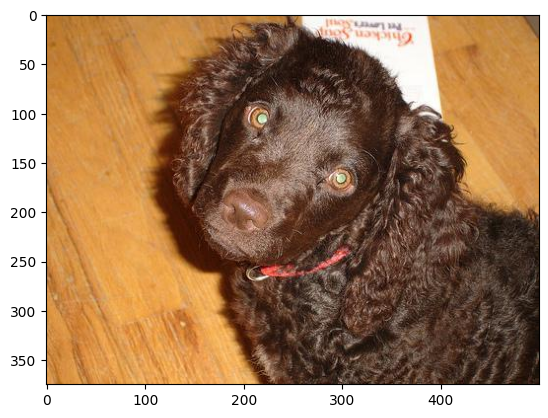

1/1 [==============================] - 0s 23ms/step
This is an image of a dog.
dog in image is a Curly-coated_retriever


In [69]:
dog_human_classifer.classification("images/American_water_spaniel_00648.jpg")

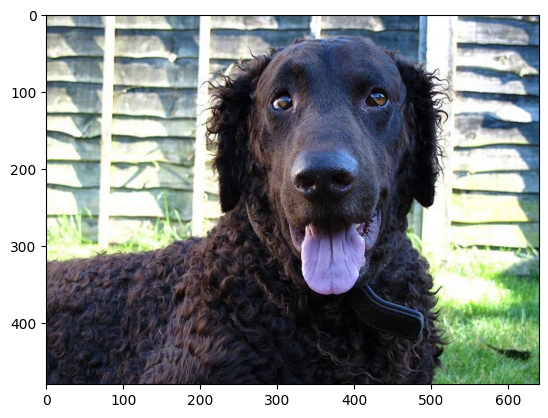

1/1 [==============================] - 0s 26ms/step
This is an image of a dog.
dog in image is a Curly-coated_retriever


In [70]:
dog_human_classifer.classification('images/Curly-coated_retriever_03896.jpg')

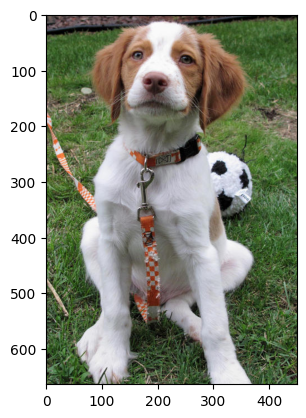

1/1 [==============================] - 0s 23ms/step
This is an image of a dog.
dog in image is a Brittany


In [71]:
dog_human_classifer.classification('images/Brittany_02625.jpg')

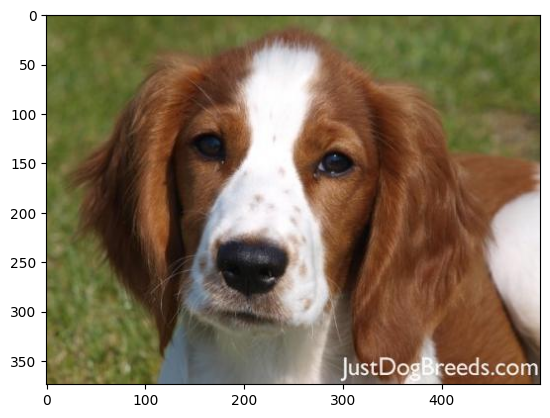

1/1 [==============================] - 0s 24ms/step
This is an image of a dog.
dog in image is a Welsh_springer_spaniel


In [72]:
dog_human_classifer.classification('images/Welsh_springer_spaniel_08203.jpg')

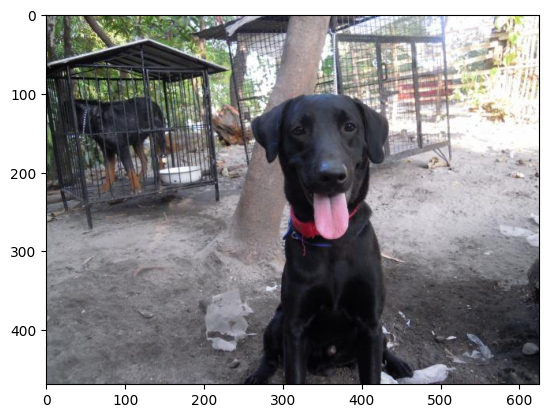

1/1 [==============================] - 0s 24ms/step
This is an image of a dog.
dog in image is a Labrador_retriever


In [73]:
dog_human_classifer.classification('images/Labrador_retriever_06449.jpg')

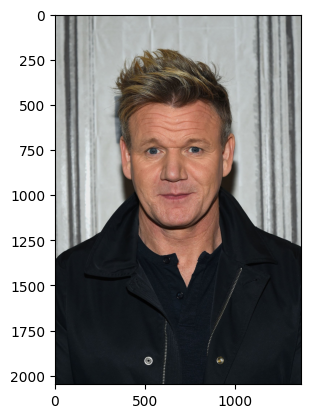

1/1 [==============================] - 0s 25ms/step
There is a human in this picture.
This hooman resembles this dog the most: Poodle


In [74]:
dog_human_classifer.classification('images/gorden_ramsey.jpeg')

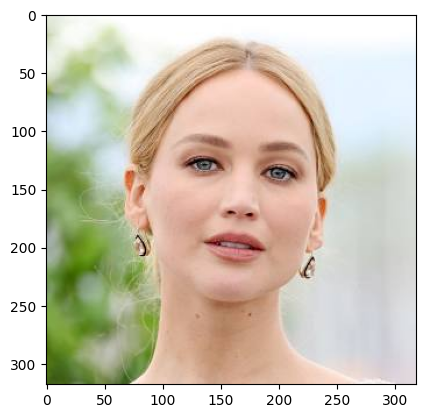

1/1 [==============================] - 0s 23ms/step
There is a human in this picture.
This hooman resembles this dog the most: Bichon_frise


In [78]:
dog_human_classifer.classification('images/jennifer_lawrence.jpeg')

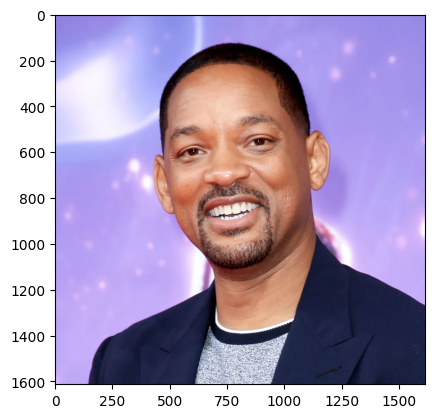

1/1 [==============================] - 0s 23ms/step
There is a human in this picture.
This hooman resembles this dog the most: Boston_terrier


In [79]:
dog_human_classifer.classification('images/Will-Smith.webp')

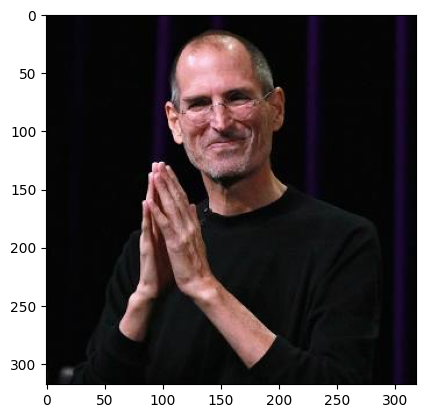

1/1 [==============================] - 0s 35ms/step
There is a human in this picture.
This hooman resembles this dog the most: Cavalier_king_charles_spaniel


In [90]:
dog_human_classifer.classification('images/steve_jobs.jpeg')

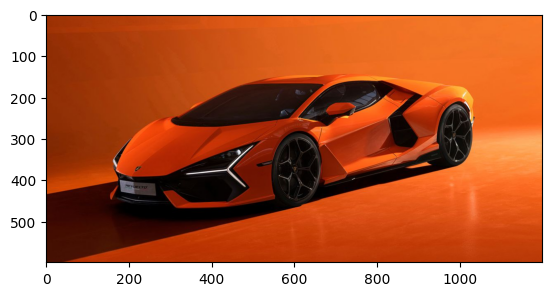

1/1 [==============================] - 0s 160ms/step


'Sorry, this is not a dog or human face.'

In [80]:
dog_human_classifer.classification('images/2024-lamborghini-revuelto-127-641a1d518802b.jpeg')